fatal: destination path 'segment-anything' already exists and is not an empty directory.
/content/segment-anything
--2025-06-19 13:14:33--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.51, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘models/sam_vit_h.pth’

models/sam_vit_h.pt 100%[===================>]   2.39G  72.6MB/s    in 22s     

2025-06-19 13:14:55 (111 MB/s) - ‘models/sam_vit_h.pth’ saved [2564550879/2564550879]



Saving samex.jpeg to samex (1).jpeg


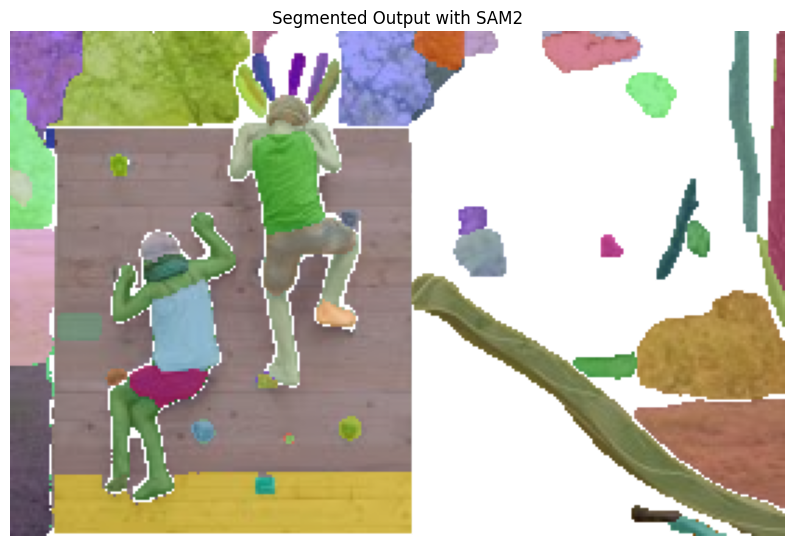

In [ ]:
# Step 1: Install dependencies
!pip install opencv-python matplotlib
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

# Step 2: Download pre-trained model checkpoint (ViT-H)
!mkdir -p models
!wget -O models/sam_vit_h.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# Step 3: Upload an image
from google.colab import files
uploaded = files.upload()

# Step 4: Load the model
import torch
from segment_anything import sam_model_registry, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load model
sam = sam_model_registry["vit_h"](checkpoint="models/sam_vit_h.pth")
predictor = SamPredictor(sam)

# Step 5: Read uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 6: Predict masks using automatic mask generator
from segment_anything import SamAutomaticMaskGenerator
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

# Step 7: Visualize masks
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    img = np.ones((anns[0]['segmentation'].shape[0], anns[0]['segmentation'].shape[1], 4))
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.random.random(3).tolist() + [0.6]
        img[m] = color_mask
    plt.imshow(img)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.title("Segmented Output with SAM2")
plt.show()
